In [1]:
import json
import re

In [2]:
# This file contains 8600ish users Data
# In the form: {'MBTI Type', 'Social Media Posts'}
dataFile = open('formatted_data.json', 'r')

In [3]:
data = []

In [4]:
# loading the json data into a list
for line in dataFile:
    data.append(json.loads(line))

In [5]:
types = []
posts = []

In [6]:
# Separating data into 2 separate lists for preprocessing
# For the most part we process the 'post' data
# we skip the first element as that is only the label
for i in range(1, len(data)):
    types.append(data[i]['Type'])
    posts.append(data[i]['Post'])

In [7]:
import pickle

tokenized_posts = []
with open ('tokenized_formatted_data.txt', 'rb') as fp:
    tokenized_posts = pickle.load(fp)

In [8]:
all_words_list = []

for user in tokenized_posts:
    for word in user:
        all_words_list.append(word)


In [9]:
from collections import Counter

In [10]:
freq_list = Counter(all_words_list)
dictionary = freq_list.most_common(10000)

In [11]:
dictionary = list(zip(*dictionary))[0]

In [12]:
nums = range(0, 10000)
word_int = dict(zip(dictionary, nums))

In [13]:
x_vals = []

for user in tokenized_posts:
    x_vals.append([word_int[x] for x in user if x in word_int.keys()])

In [14]:
intro_extro = [word[0:1] for word in types[0:len(types)]]
bin_intro_extro = []
for letter in intro_extro:
    if (letter == 'I'):
        bin_intro_extro.append(0)
    else:
        bin_intro_extro.append(1)

In [27]:
import numpy as np
import random
random.seed(500)

x = np.array(x_vals)
random.shuffle(x)
test_data = x[:1500]
train_data = x[1500:]

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
from keras.utils.np_utils import to_categorical

y = np.asarray(bin_intro_extro).astype('float32')
random.shuffle(y)
y_test = y[:1500]
y_train = y[1500:]

In [29]:
x_val = x_train[:1500]
x_partial_train = x_train[1500:]

y_val = y_train[:1500]
y_partial_train = y_train[1500:]

In [30]:
from keras import models
from keras import layers
import tensorflow as tf

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [36]:
model = build_model()
with tf.device('/gpu:0'):
    history = model.fit(x_partial_train, y_partial_train, epochs = 10, batch_size = 256, validation_data=(x_val, y_val), verbose=0)

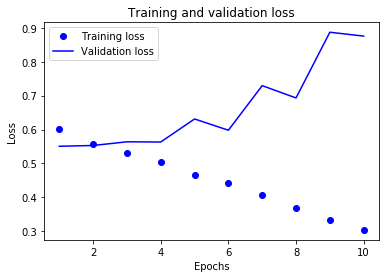

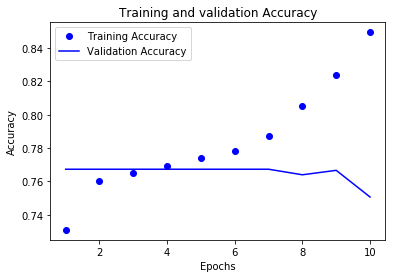

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

train_acc = history_dict['acc']
val_acc   = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
model = build_model()
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, epochs=10, batch_size=256)
    
results = model.evaluate(x_test, y_test)
results

Epoch 1/10
7175/7175 [==============================] - 1s 185us/step - loss: 0.5908 - acc: 0.7470
Epoch 2/10
7175/7175 [==============================] - 1s 106us/step - loss: 0.5576 - acc: 0.7639
Epoch 3/10
7175/7175 [==============================] - 1s 105us/step - loss: 0.5315 - acc: 0.7681
Epoch 4/10
7175/7175 [==============================] - 1s 107us/step - loss: 0.4923 - acc: 0.7684
Epoch 5/10
7175/7175 [==============================] - 1s 106us/step - loss: 0.4665 - acc: 0.7693
Epoch 6/10
7175/7175 [==============================] - 1s 109us/step - loss: 0.4319 - acc: 0.7698
Epoch 7/10
7175/7175 [==============================] - 1s 107us/step - loss: 0.4044 - acc: 0.7695
Epoch 8/10
7175/7175 [==============================] - 1s 124us/step - loss: 0.3757 - acc: 0.7766
Epoch 9/10
7175/7175 [==============================] - 1s 112us/step - loss: 0.3445 - acc: 0.8082
Epoch 10/10
1500/1500 [==============================] - 0s 272us/step


[0.7859112076759338, 0.7566666666666667]